## Vision --- Feature detection

### Import libraries

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Image paths

In [38]:
PATH_SUDOKU = "..\images\sudoku.jpg"
PATH_CHESS = "..\images\chessboard.png"

## Canny Edge detection

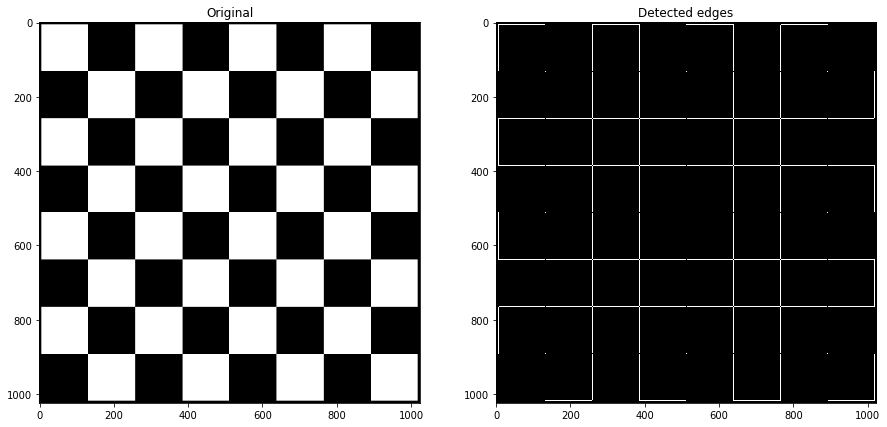

In [54]:
# Edge detection may be achieved using the Canny OpenCV member
# A sudoku game is used in this example

img = cv2.imread(PATH_SUDOKU)                                                     # read image

edges = cv2.Canny(img, threshold1 = 50, threshold2 = 100, apertureSize = 3)       # call Canny OpenCV function

# show the original, edges
fig, (ax1, ax2) = plt.subplots(figsize = (15, 10), ncols = 2)
ax1.imshow(img, cmap = 'gray'), ax1.set_title("Original")
ax2.imshow(edges, cmap = 'gray'), ax2.set_title("Detected edges")
plt.show()

## Corner detection

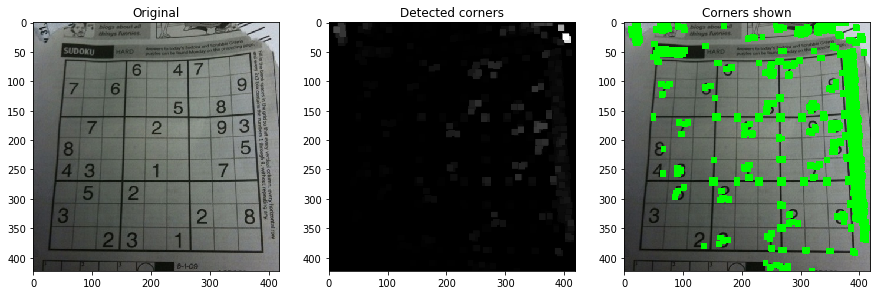

In [55]:
# Corner detection may be achieved using the cornerHarris OpenCV member
# A chessboard is used in this example

img = cv2.imread(PATH_CHESS)                                                # load image, default as BGR
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)                              # convert BGR to RGB
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)                            # convert BGR to gray - for corner detection

img_gray = np.float32(img_gray)                                             # set data type to 32-bit floating point

corners = cv2.cornerHarris(img_gray, blockSize = 2, ksize = 3, k = 0.03)    # call corner Harris OpenCV method

kernel = np.ones((10,10), np.uint8)                                         # kernel for dilate function
corners = cv2.dilate(corners, kernel)                                       # dilate corners using kernel

img[corners > 0.01 * corners.max()] = [0, 255, 0]                           # make detected corner pixels green on original
img_rgb_corners = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)                       # convert to RGB

# show the original, detected corners, corners on original
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (15, 10), ncols = 3)
ax1.imshow(img_rgb), ax1.set_title("Original")
ax2.imshow(corners, cmap = 'gray'), ax2.set_title("Detected corners")
ax3.imshow(img_rgb_corners), ax3.set_title("Corners shown")
plt.show()